# **ML- LAB2 (Housing csv part 2)**

In [22]:
import pandas as pd
df=pd.read_csv('housing.csv')

Perform the describe and info steps

In [23]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Plot the histogram of each feature( Indicate what does histogram
indicate on median_income and house_median_age)**


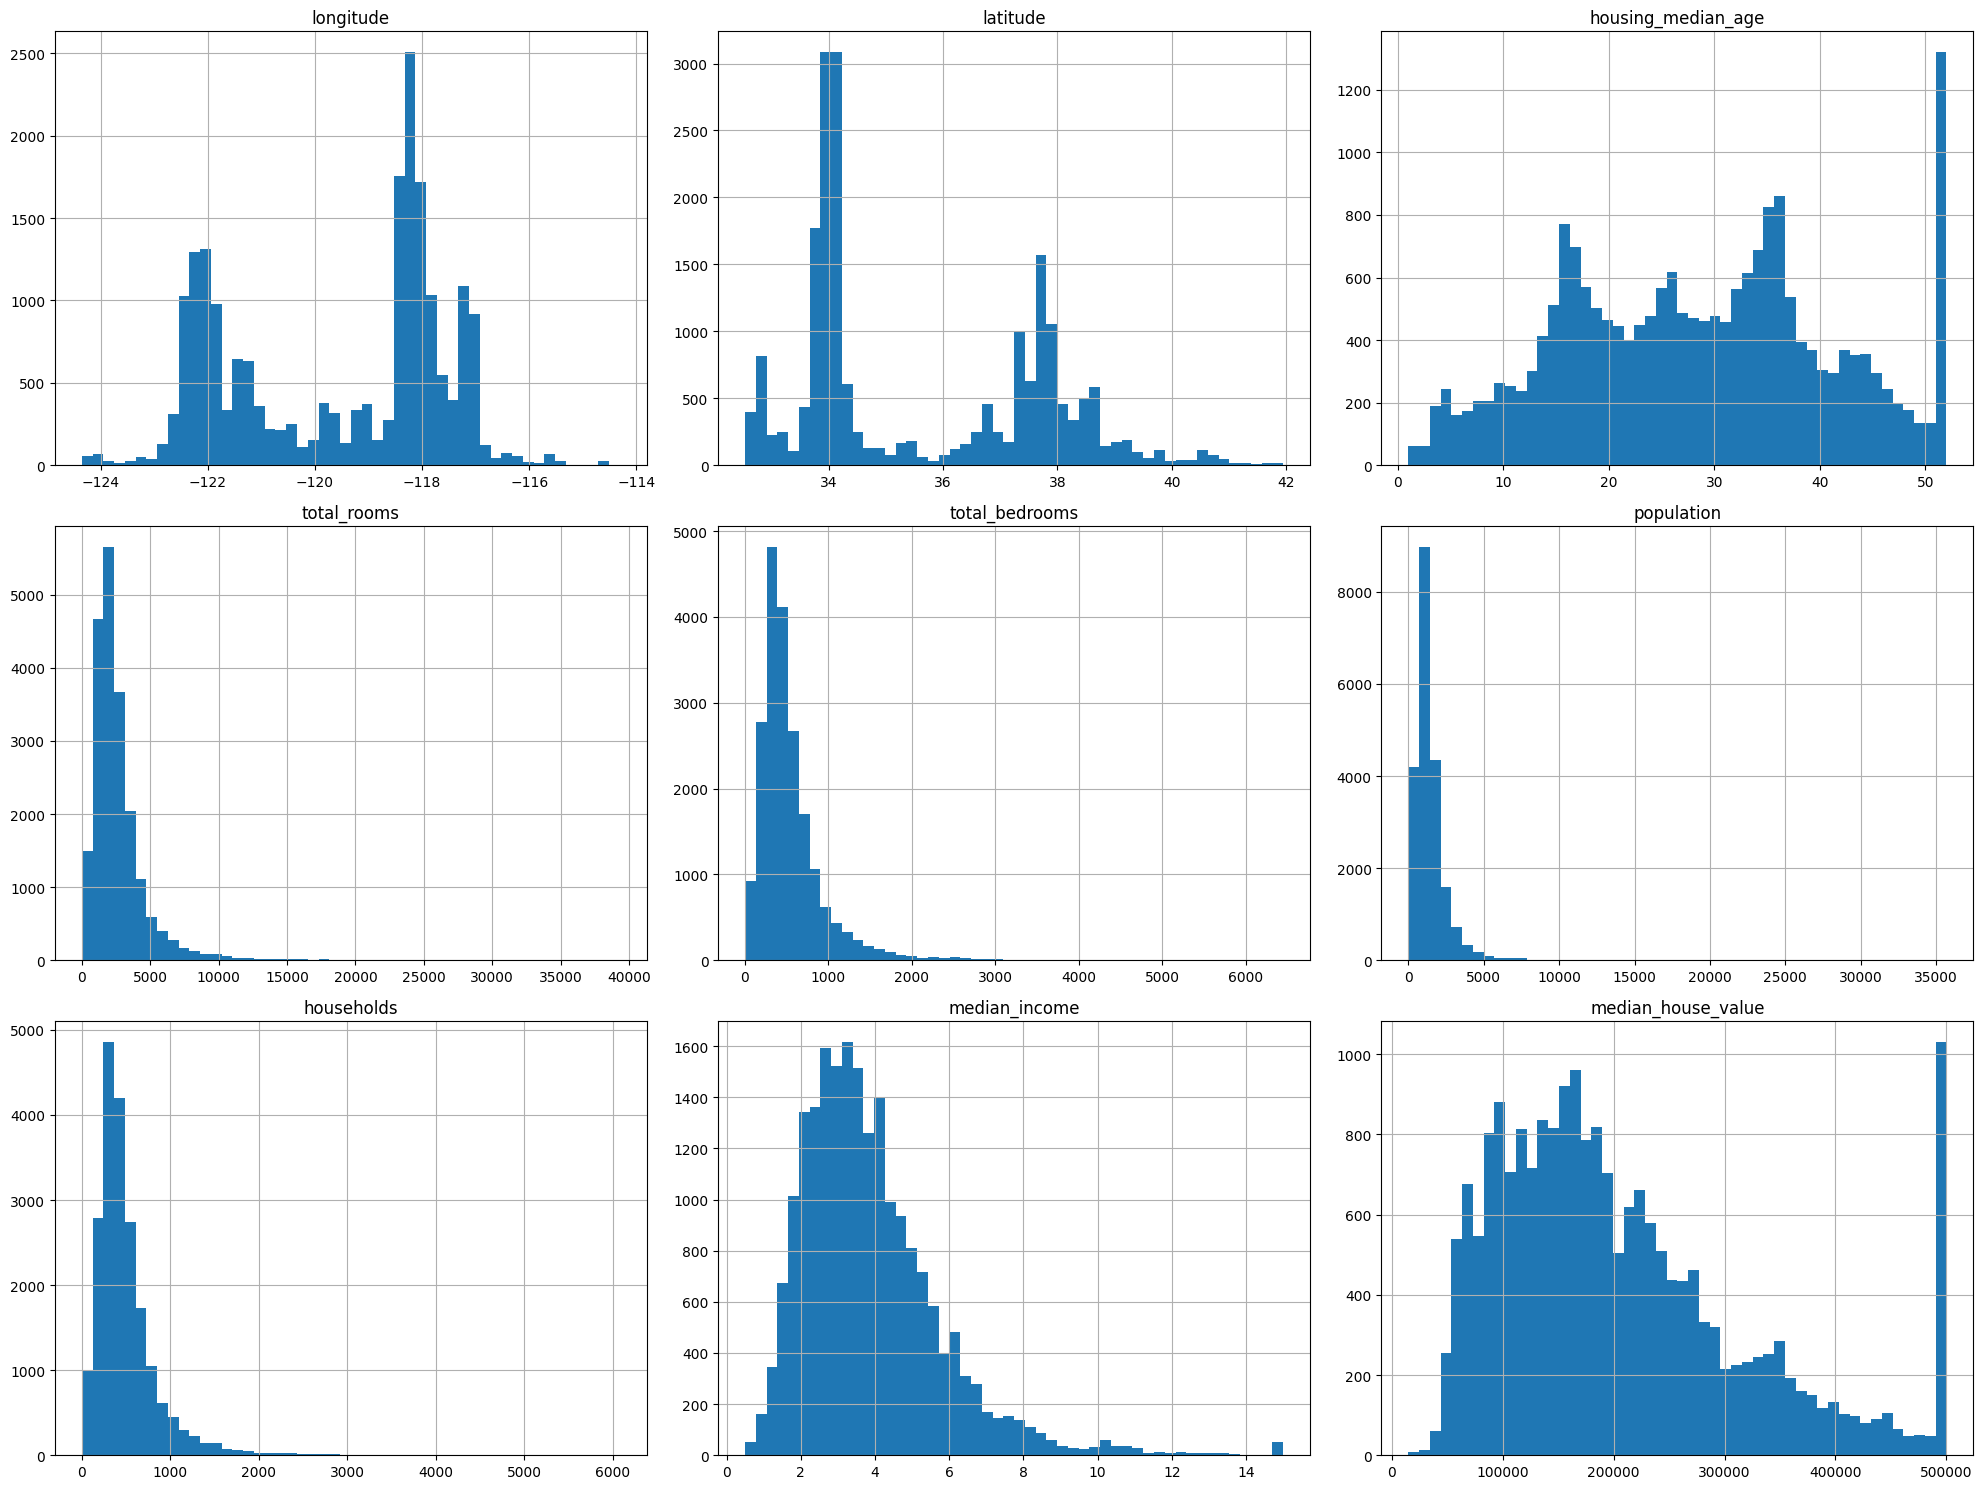

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

**3)Demonstrate the process of creating a test set( write the difference
between random and stratified test set)**

In [26]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print("Train size:", len(train_set))
print("Test size:", len(test_set))

Train size: 16512
Test size: 4128


Stratified

In [27]:
import numpy as np
import pandas as pd

df["lat_cat"] = pd.cut(df["latitude"],
                       bins=5,
                       labels=[1, 2, 3, 4, 5])

strat_train_set, strat_test_set = train_test_split(
    df,
    test_size=0.2,
    stratify=df["lat_cat"],
    random_state=42
)

for set_ in (strat_train_set, strat_test_set):
    set_.drop("lat_cat", axis=1, inplace=True)
print("Train size:", len(strat_train_set))
print("Test size:", len(strat_test_set))

Train size: 16512
Test size: 4128


#List the geographical features from the dataset and plot a graph to Visualize Geographical Data(what does the graph indicate w.r.t housing prices and location)

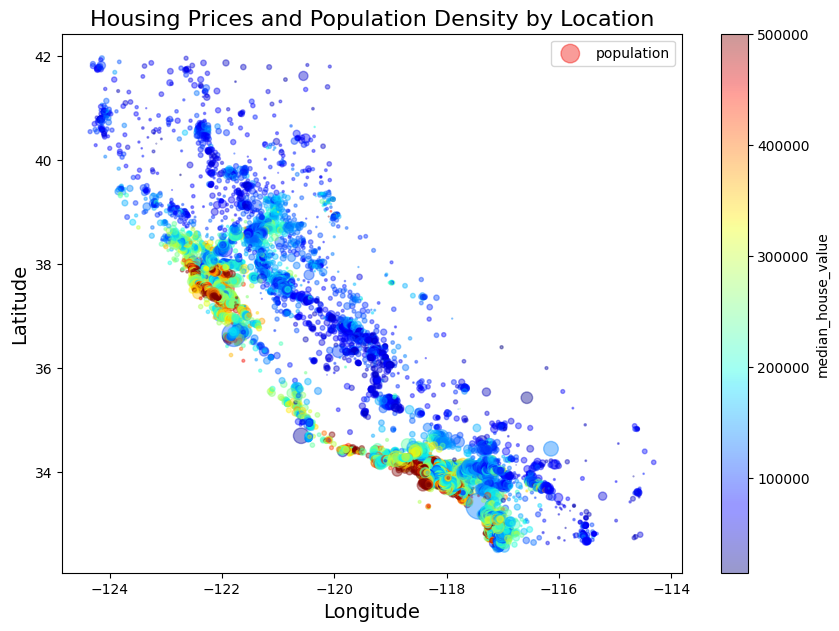

In [28]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=df["population"]/100, label="population", figsize=(10,7),
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
        sharex=False)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title("Housing Prices and Population Density by Location", fontsize=16)
plt.legend()
plt.show()

#Plot a graph to show features correlation with housing price. Which feature corelates to the maximum. Plot the graph for that with housing price and analyze what the graph indicate

In [29]:
corr_matrix = df.corr(numeric_only=True)
print("Correlation matrix calculated.")

median_house_value_correlations = corr_matrix["median_house_value"].sort_values(ascending=False)
print("Correlations with median_house_value extracted.")
print(median_house_value_correlations)

Correlation matrix calculated.
Correlations with median_house_value extracted.
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


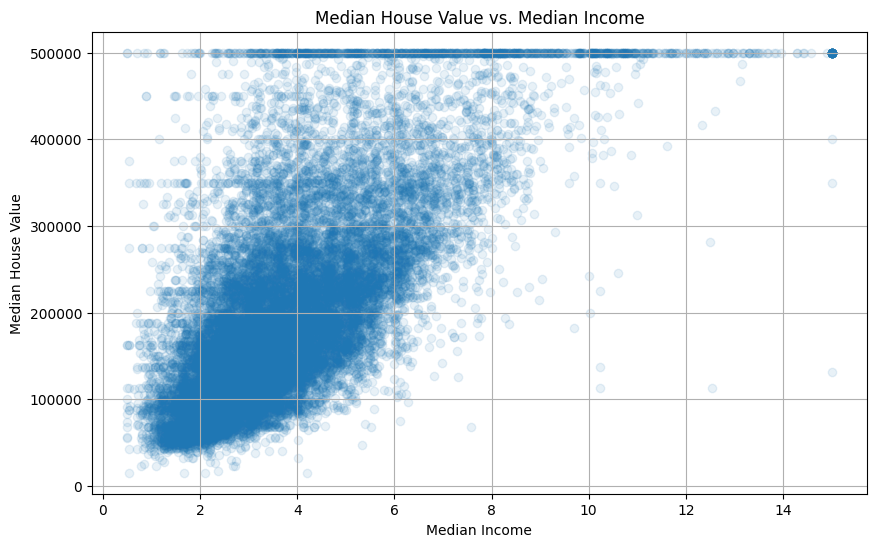

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df["median_income"], df["median_house_value"], alpha=0.1)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median House Value vs. Median Income")
plt.grid(True)
plt.show()


In [31]:

corr_matrix = df.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


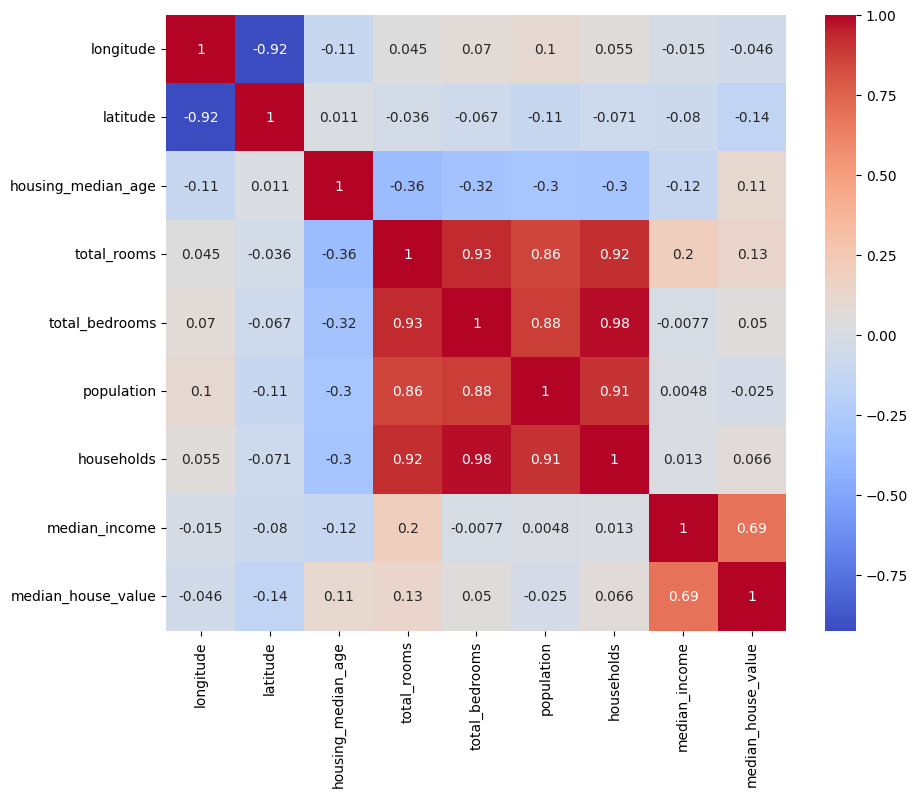

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

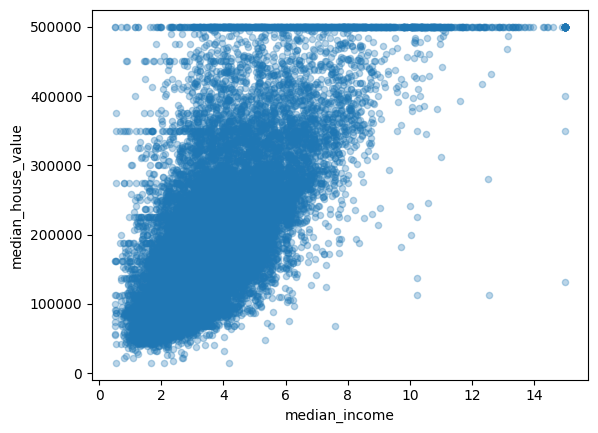

In [33]:
df.plot(kind="scatter",
             x="median_income",
             y="median_house_value",
             alpha=0.3)
plt.show()

In [34]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"] = df["population"]/df["households"]

In [35]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_household,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population_per_household,-0.023737
population,-0.024650
longitude,-0.045967


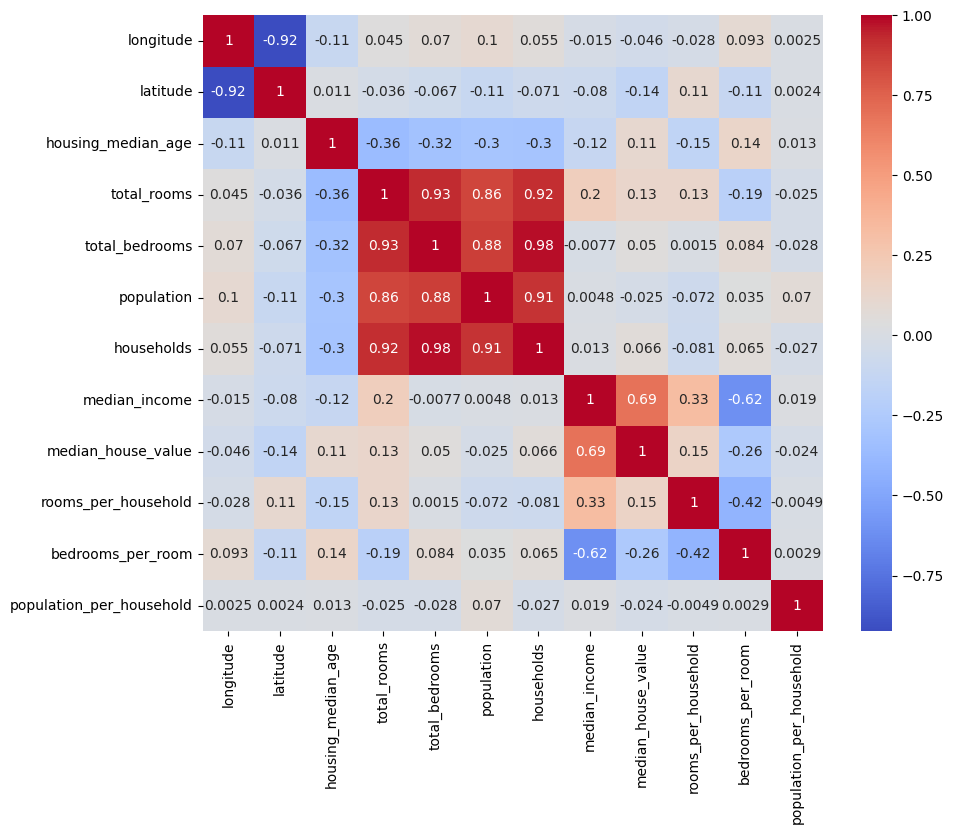

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [37]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = df.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)
housing_num_imputed = imputer.transform(housing_num)


In [38]:
df.isnull().sum().sum()

np.int64(414)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20640 non-null  float64 
 1   latitude                  20640 non-null  float64 
 2   housing_median_age        20640 non-null  float64 
 3   total_rooms               20640 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20640 non-null  float64 
 6   households                20640 non-null  float64 
 7   median_income             20640 non-null  float64 
 8   median_house_value        20640 non-null  float64 
 9   ocean_proximity           20640 non-null  object  
 10  lat_cat                   20640 non-null  category
 11  rooms_per_household       20640 non-null  float64 
 12  bedrooms_per_room         20433 non-null  float64 
 13  population_per_household  20640 non-null  floa

In [40]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

In [41]:

from sklearn.preprocessing import OneHotEncoder
housing_cat = df[["ocean_proximity"]]

encoder = OneHotEncoder()
housing_cat_encoded = encoder.fit_transform(housing_cat)

print(encoder.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_num)

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:,3] / X[:,6]
        population_per_household = X[:,5] / X[:,6]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,4] / X[:,3]
            return np.c_[X, rooms_per_household,
                         population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household,
                         population_per_household]

In [44]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"]

num_attribs = list(housing.drop("ocean_proximity", axis=1))
cat_attribs = ["ocean_proximity"]


In [46]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('scaler', StandardScaler()),
])


In [48]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [49]:
housing_prepared = full_pipeline.fit_transform(housing)

#`THE END✅`



